# Textmining

---

Group name: D

---


In [44]:
import pandas as pd 

In [45]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



In [46]:
df=pd.read_csv("~/Documents/GitHub/homework-1/data/raw/webscraping.csv")

In [47]:
df['Text'] = df['Text'].astype(str).str.lower()
df['Title'] = df['Title'].astype(str).str.lower()

df.head()

,Unnamed: 0,Text,Title
0,0,"when roswell schaeffer sr. was 8 years old, hi...",the mystery of alaska’s disappearing whales | ...


In [48]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df['Text_Token']=df['Text'].apply(regexp.tokenize)
df['Title_Token']=df['Title'].apply(regexp.tokenize)

df.head()

,Unnamed: 0,Text,Title,Text_Token,Title_Token
0,0,"when roswell schaeffer sr. was 8 years old, hi...",the mystery of alaska’s disappearing whales | ...,"[when, roswell, schaeffer, sr, was, 8, years, ...","[the, mystery, of, alaska, s, disappearing, wh..."


In [49]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jakob.desantis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
from nltk.corpus import stopwords

In [105]:
my_stopwords = ['wired', 'but', 'the', 'and', 'that', 'are']

my_stopwords

['wired', 'but', 'the', 'and', 'that', 'are']

In [106]:
df['Text_Token_1'] = df['Text_Token'].apply(lambda x: [i for i in x if i not in my_stopwords])
df['Title_Token_1'] = df['Title_Token'].apply(lambda x: [i for i in x if i not in my_stopwords])

df.head()

,Unnamed: 0,Text,Title,Text_Token,Title_Token,Text_Token_1,Title_Token_1,Text__Token_2,Title_Token_2,Text_Token_2,Text_lem,Title_lem
0,0,"when roswell schaeffer sr. was 8 years old, hi...",the mystery of alaska’s disappearing whales | ...,"[when, roswell, schaeffer, sr, was, 8, years, ...","[the, mystery, of, alaska, s, disappearing, wh...","[when, roswell, schaeffer, sr, was, 8, years, ...","[mystery, of, alaska, s, disappearing, whales]",roswell schaeffer was years old his father dec...,mystery alaska disappearing whales,when roswell schaeffer was years old his fathe...,when roswell schaeffer was years old his fathe...,mystery alaska disappearing whales


In [107]:
df['Text_Token_2'] = df['Text_Token_1'].apply(lambda x: ' '.join([i for i in x if len(i)>2]))
df['Title_Token_2'] = df['Title_Token_1'].apply(lambda x: ' '.join([i for i in x if len(i)>2]))

df.head()

,Unnamed: 0,Text,Title,Text_Token,Title_Token,Text_Token_1,Title_Token_1,Text__Token_2,Title_Token_2,Text_Token_2,Text_lem,Title_lem
0,0,"when roswell schaeffer sr. was 8 years old, hi...",the mystery of alaska’s disappearing whales | ...,"[when, roswell, schaeffer, sr, was, 8, years, ...","[the, mystery, of, alaska, s, disappearing, wh...","[when, roswell, schaeffer, sr, was, 8, years, ...","[mystery, of, alaska, s, disappearing, whales]",roswell schaeffer was years old his father dec...,mystery alaska disappearing whales,when roswell schaeffer was years old his fathe...,when roswell schaeffer was years old his fathe...,mystery alaska disappearing whales


In [108]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jakob.desantis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jakob.desantis/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [109]:
from nltk.stem import WordNetLemmatizer

In [110]:
wordnet_lem = WordNetLemmatizer()

In [111]:
df['Text_lem'] = df['Text_Token_2'].apply(wordnet_lem.lemmatize)
df['Title_lem'] = df['Title_Token_2'].apply(wordnet_lem.lemmatize)

In [112]:
check_difference = (df['Text_lem'] == df['Text_Token_2'])
check_difference.value_counts()

True    1
dtype: int64

In [113]:
check_difference = (df['Title_lem'] == df['Title_Token_2'])
check_difference.value_counts()

True    1
dtype: int64

In [114]:
all_words_articletext = ' '.join([i for i in df['Text_lem']])

In [115]:
all_words_articletitle = ' '.join([i for i in df['Title_lem']])

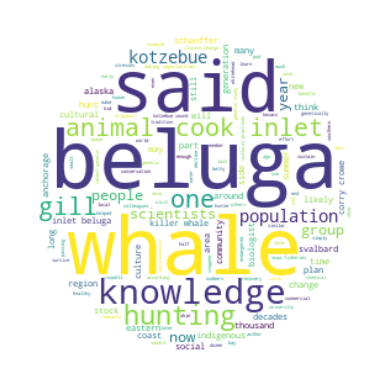

In [116]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import numpy as np
x, y = np.ogrid[:300, :300]
mask = (x - 150) **2 + (y - 150) **2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words_articletext)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show;

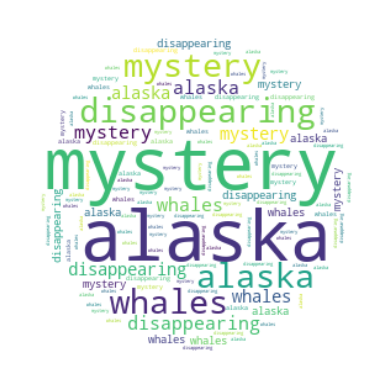

In [117]:
wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words_articletitle)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show;

Ab hier nur noch mit dem Text weitergemacht, da der Titel eine sehr überschaubare Anzahl an Wörtern hat. Kein Wort kommt doppelt vor, das Interessante ist der Artikeltext.

In [118]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jakob.desantis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [119]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [120]:
words_tokens = nltk.word_tokenize(all_words_articletext)

In [121]:
fd = FreqDist(words_tokens)
fd

FreqDist({'belugas': 43, 'whales': 24, 'they': 22, 'said': 21, 'for': 20, 'from': 19, 'when': 17, 'with': 17, 'beluga': 15, 'have': 15, ...})

In [122]:
top_4 = fd.most_common(n=4)
top_4

[('belugas', 43), ('whales', 24), ('they', 22), ('said', 21)]

In [123]:
fd.tabulate(4)

belugas  whales    they    said 
     43      24      22      21 


In [124]:
top_10 = fd.most_common(10)

top_10

[('belugas', 43),
 ('whales', 24),
 ('they', 22),
 ('said', 21),
 ('for', 20),
 ('from', 19),
 ('when', 17),
 ('with', 17),
 ('beluga', 15),
 ('have', 15)]

In [125]:
df_frequence = pd.DataFrame({"frequency": dict(top_10)})

df_frequence

,frequency
beluga,15
belugas,43
for,20
from,19
have,15
said,21
they,22
whales,24
when,17
with,17


In [126]:
df_frequence.reset_index(inplace=True)

df_frequence

,index,frequency
0,beluga,15
1,belugas,43
2,for,20
3,from,19
4,have,15
5,said,21
6,they,22
7,whales,24
8,when,17
9,with,17


In [127]:
import altair as alt 
alt.Chart(df_frequence).mark_bar().encode(
    x = alt.X("frequency"),
    y = alt.Y("index", sort = "-x")
)

alt.Chart(...)

In [128]:
fd["belugas"]

43

In [129]:
df.to_csv("~/Documents/GitHub/homework-1/data/processed/textmining-clean.csv")